In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Toàn bộ dữ liệu từ bảng (chiều cao cm, cân nặng kg)
X_full = np.array([[147, 150, 153, 155, 158, 160, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
y_full = np.array([[49, 50, 51, 52, 54, 56, 58, 59, 60, 72, 63, 64, 66, 67, 68]]).T

# Chia dữ liệu: Chừa 3 người cuối để test
X_train = X_full[:-3]
y_train = y_full[:-3]

X_test = X_full[-3:]
y_test = y_full[-3:]

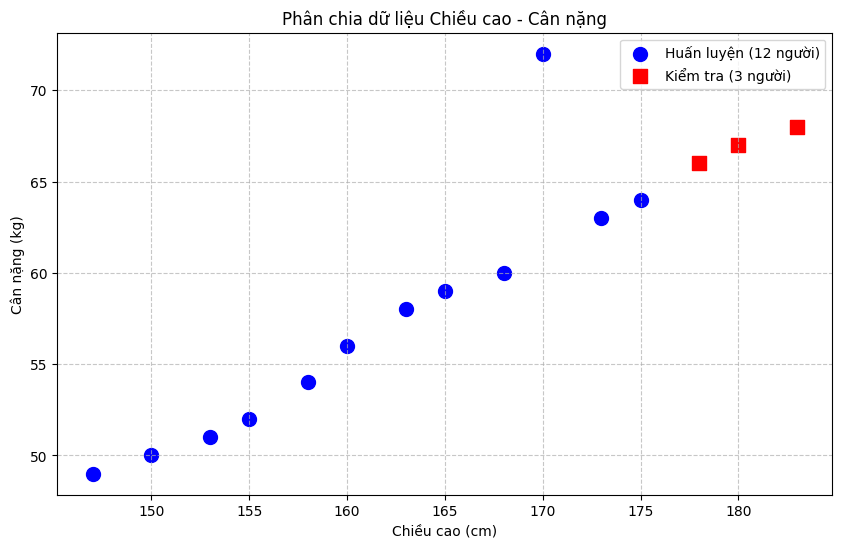

In [2]:
plt.figure(figsize=(10, 6))

# Vẽ tập huấn luyện màu xanh
plt.scatter(X_train, y_train, color='blue', label='Huấn luyện (12 người)', s=100)

# Vẽ tập kiểm tra màu đỏ
plt.scatter(X_test, y_test, color='red', marker='s', label='Kiểm tra (3 người)', s=100)

plt.title('Phân chia dữ liệu Chiều cao - Cân nặng')
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân nặng (kg)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [4]:
one = np.ones((X_train.shape[0], 1))
xbar = np.concatenate((one, X_train), axis = 1)

A = np.dot(xbar.T, xbar)
b = np.dot(xbar.T, y_train)
w = np.dot(np.linalg.pinv(A), b)
print(w)

[[-50.52281628]
 [  0.66818472]]


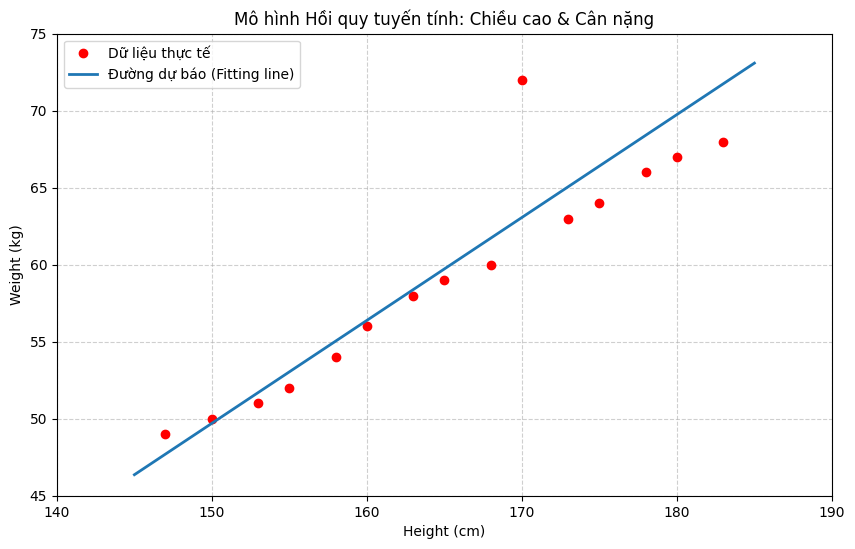

In [6]:
import numpy as np
import matplotlib.pyplot as plt

w_0 = w[0][0]
w_1 = w[1][0]

x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1 * x0

plt.figure(figsize=(10, 6))

plt.plot(X_full, y_full, 'ro', label='Dữ liệu thực tế')

plt.plot(x0, y0, label='Đường dự báo (Fitting line)', linewidth=2)

plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Mô hình Hồi quy tuyến tính: Chiều cao & Cân nặng')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()

In [11]:

y_pred = [w_1 * x + w_0 for x in X_test]

print("--- KẾT QUẢ DỰ ĐOÁN TRÊN TẬP TEST ---")
for i in range(len(X_test)):
    prediction = w_1 * X_test[i][0] + w_0

    print("Dự đoán cân nặng của người với chiều cao %d cm: %.2f (kg), thực tế: %d (kg)" %
          (X_test[i].item(), prediction, y_test[i].item()))

--- KẾT QUẢ DỰ ĐOÁN TRÊN TẬP TEST ---
Dự đoán cân nặng của người với chiều cao 178 cm: 68.41 (kg), thực tế: 66 (kg)
Dự đoán cân nặng của người với chiều cao 180 cm: 69.75 (kg), thực tế: 67 (kg)
Dự đoán cân nặng của người với chiều cao 183 cm: 71.75 (kg), thực tế: 68 (kg)


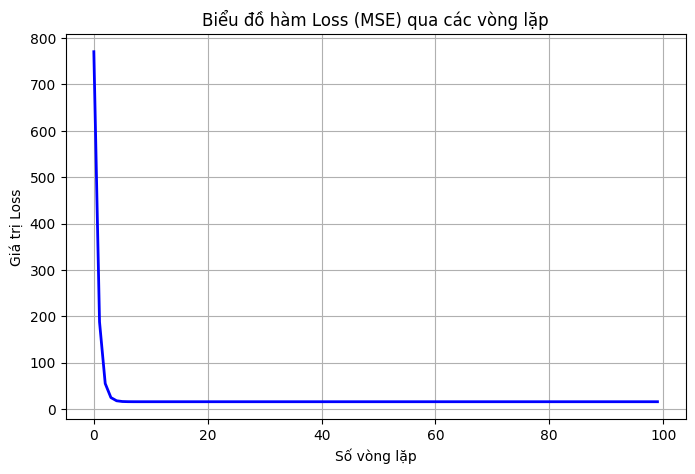

Vector trọng số w = 
[[0.00190476]
 [0.35608985]]
------------------------------


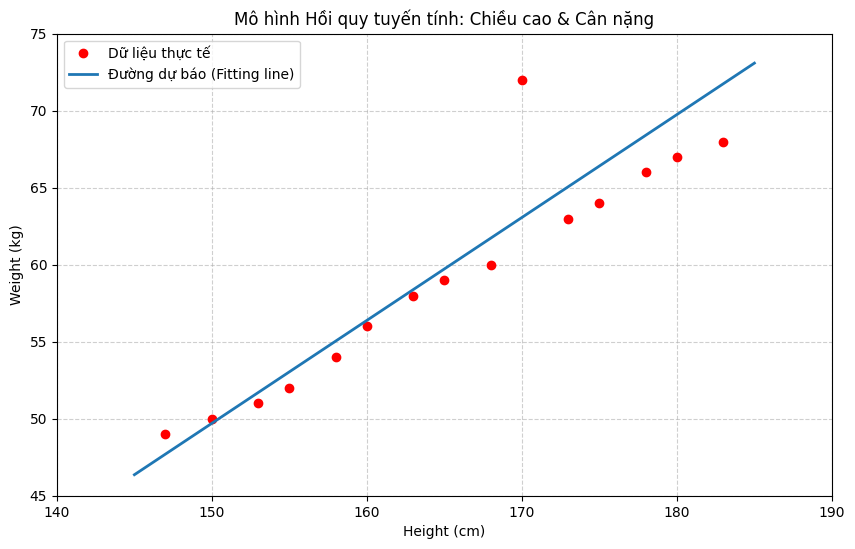

--- KẾT QUẢ DỰ ĐOÁN TRÊN TẬP TEST ---
Dự đoán cân nặng của người với chiều cao 178 cm: 68.41 (kg), thực tế: 66 (kg)
Dự đoán cân nặng của người với chiều cao 180 cm: 69.75 (kg), thực tế: 67 (kg)
Dự đoán cân nặng của người với chiều cao 183 cm: 71.75 (kg), thực tế: 68 (kg)


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu
X_full = np.array([[147, 150, 153, 155, 158, 160, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
y_full = np.array([[49, 50, 51, 52, 54, 56, 58, 59, 60, 72, 63, 64, 66, 67, 68]]).T

# Chia dữ liệu: 12 người đầu huấn luyện, 3 người cuối kiểm tra
X_train = X_full[:12]
y_train = y_full[:12]
X_test = X_full[12:]
y_test = y_full[12:]

# --- PHẦN 1: VẼ BIỂU ĐỒ LOSS (CÁCH LÀM THÔNG THƯỜNG) ---
X_b = np.c_[np.ones((len(X_train), 1)), X_train] # Thêm cột 1 cho bias
w_gd = np.array([[0.0], [0.0]]) # Khởi tạo trọng số ngẫu nhiên
learning_rate = 0.00001
loss_history = []

for i in range(100): # Chạy 100 vòng lặp
    gradients = 2/len(X_train) * X_b.T @ (X_b @ w_gd - y_train)
    w_gd = w_gd - learning_rate * gradients
    loss = np.mean((X_b @ w_gd - y_train)**2) # Tính MSE
    loss_history.append(loss)


# Vẽ đồ thị Loss
plt.figure(figsize=(8, 5))
plt.plot(loss_history, color='blue', linewidth=2)
plt.title('Biểu đồ hàm Loss (MSE) qua các vòng lặp')
plt.xlabel('Số vòng lặp')
plt.ylabel('Giá trị Loss')
plt.grid(True)
plt.show()

# TEST
w_opt = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y_train
w_0 = w_opt[0][0]
w_1 = w_opt[1][0]

print("Vector trọng số w = ")
print(w_gd)
print("-" * 30)

x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1 * x0

plt.figure(figsize=(10, 6))

plt.plot(X_full, y_full, 'ro', label='Dữ liệu thực tế')

plt.plot(x0, y0, label='Đường dự báo (Fitting line)', linewidth=2)

plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Mô hình Hồi quy tuyến tính: Chiều cao & Cân nặng')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()

print("--- KẾT QUẢ DỰ ĐOÁN TRÊN TẬP TEST ---")
for i in range(len(X_test)):
    # Tính dự đoán theo công thức: y = w1*x + w0
    y_pred = w_1 * X_test[i][0] + w_0

    print("Dự đoán cân nặng của người với chiều cao %d cm: %.2f (kg), thực tế: %d (kg)" %
          (X_test[i].item(), y_pred, y_test[i].item()))